In [1]:
import os
import sys
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Limpieza de los datos

Se trabaja con la data realizada en la encuesta universitaria

In [2]:
# funciones personalizadas
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.utils import *

## Lectura y preprocesamiento de datos

* Se limpia la fila demas
* Se combinan las columnas para formar una unica que conforma el valor asignado por el estudiante
* Se eliminan otras columnas vacias y que no presentan variación
* Se asigna como indice el tiempo

In [3]:
# extract data
df = pd.read_excel('../data_student_satisfaction.xlsx')

# delete first row
df = df.iloc[1: , :] 
#df.apply(lambda x: ','.join(x.dropna()), axis=1)

# clean NaN and combine columns
df = five_question_columns_cleaner(df)

# drop columns for id
df = df[df.columns[2::]]

# Set date as index
df = df.set_index('date_created')

# Drop aparently unuseful columns
df = df.iloc[: , 7::] 

## Verificación de la limpieza
* Se detectan nan en la columna de edades
    > Se debe a la presencia de texto en la columna

In [4]:
df.head()

,Indique su edad:,Indique el género con el cual se identifica:,Indique el tipo de establecimiento educacional de procedencia:,Indique el rango de su puntaje obtenido en la prueba de selección universitaria (PSU) o en la Prueba de Transición para la Admisión Universitaria centralizada (PDT):,Indique el rango en el que se ubica el promedio de sus notas de enseñanza media (NEM):,Puedo comprender en profundidad el contenido de los cursos del presente semestre.,Puedo manejar los contenidos incluso en los cursos más avanzados.,Puedo hacer un excelente trabajo resolviendo problemas y en tareas asignadas por mis cursos durante el presente semestre.,"Comparado con otros estudiantes, ¿cuán bien esperas que te vaya en tus cursos de este año?.","Del 1 al 5, en una escala de mal a mejor, ¿Cómo crees que será tu desempeño este año?.",...,El (La) profesor(a) ofreció nuevas ideas y perspectivas acerca de los problemas presentados en clases.,Disfruté siendo un(a) estudiante de este curso.,Este curso cumplió mis expectativas.,Adquirí herramientas para el desarrollo de mis habilidades.,Estoy satisfecho(a) con la educación recibida en este curso.,Logré los resultados de aprendizaje del curso.,La carga de este curso fue muy alta.,Este curso fue muy complejo.,Este es/fue un curso muy relevante para mi formación.,"Mi nota final del curso, ¿en qué cuartil se encontrará o se encuentra a la fecha en comparación a los(as) otros(as) estudiantes?."
date_created,,,,,,,,,,,,,,,,,,,,,
2021-08-10 13:00:12,24.0,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4.0,5.0,4.0,Mejor,5.0,...,4.0,4.0,4.0,5.0,5.0,4.0,1.0,2.0,5.0,Dentro de las más altas del curso.
2021-08-09 11:15:21,23.0,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3.0,3.0,3.0,Peor,3.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,En el promedio.
2021-08-06 08:19:44,25.0,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4.0,5.0,4.0,Mejor,5.0,...,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,5.0,En el promedio.
2021-08-05 18:37:16,23.0,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4.0,3.0,4.0,Peor,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,En el promedio.
2021-08-05 18:19:51,20.0,Femenino,Subvencionado,Entre 551 y 600,"Entre 6,0 y 6,4",5.0,4.0,5.0,Mejor,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [5]:
df.describe()

,Puedo comprender en profundidad el contenido de los cursos del presente semestre.,Puedo manejar los contenidos incluso en los cursos más avanzados.,Puedo hacer un excelente trabajo resolviendo problemas y en tareas asignadas por mis cursos durante el presente semestre.,"Del 1 al 5, en una escala de mal a mejor, ¿Cómo crees que será tu desempeño este año?.",Ser un/a buen/a estudiante de mi carrera es parte importante de quien soy.,Cumplir con las tareas de mi carrera es muy importante para mi.,El éxito de la facultad/escuela a la que pertenece mi carrera es muy valioso para mi.,Molesto(a).,Hostil.,Alerta.,...,"El (La) profesor(a) usó diversos métodos para transferir conocimiento (videos, discusión, pizarra, paneles, entre otros).",El (La) profesor(a) ofreció nuevas ideas y perspectivas acerca de los problemas presentados en clases.,Disfruté siendo un(a) estudiante de este curso.,Este curso cumplió mis expectativas.,Adquirí herramientas para el desarrollo de mis habilidades.,Estoy satisfecho(a) con la educación recibida en este curso.,Logré los resultados de aprendizaje del curso.,La carga de este curso fue muy alta.,Este curso fue muy complejo.,Este es/fue un curso muy relevante para mi formación.
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.00000
mean,3.104677,3.008909,3.189310,3.269488,3.536748,3.835189,3.532294,2.610245,2.037862,3.000000,...,2.728285,2.759465,2.750557,2.730512,2.917595,2.781737,2.755011,2.476615,2.380846,2.96882
std,1.352973,1.380641,1.392669,1.401842,1.593544,1.551068,1.602023,1.481126,1.353201,1.564106,...,2.046802,2.061565,2.095948,2.112036,2.105452,2.104741,2.007270,1.854052,1.808879,2.07857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.00000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


created missing indicator for: Indique su edad:
created missing indicator for: Carrera:
created missing indicator for: Nombre de la asignatura:
created missing indicator for: ¿Recomendaría al (la) profesor(a) para que vuelva a impartir este curso? De tres razones que justifiquen su respuesta.
created missing indicator for: Describa una situación donde usted se haya sentido satisfecho(a) durante el curso.
created missing indicator for: Describa una situación donde usted se haya sentido muy insatisfecho(a) durante el curso.
0    340
5     89
6     20
Name: num_missing, dtype: int64


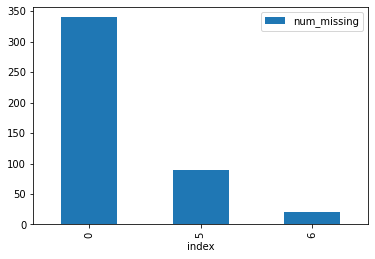

In [6]:
df_missing = df_describe_missing(df)

In [7]:
df_missing.loc[df_missing['num_missing'] == 6]

,Indique su edad:,Indique el género con el cual se identifica:,Indique el tipo de establecimiento educacional de procedencia:,Indique el rango de su puntaje obtenido en la prueba de selección universitaria (PSU) o en la Prueba de Transición para la Admisión Universitaria centralizada (PDT):,Indique el rango en el que se ubica el promedio de sus notas de enseñanza media (NEM):,Puedo comprender en profundidad el contenido de los cursos del presente semestre.,Puedo manejar los contenidos incluso en los cursos más avanzados.,Puedo hacer un excelente trabajo resolviendo problemas y en tareas asignadas por mis cursos durante el presente semestre.,"Comparado con otros estudiantes, ¿cuán bien esperas que te vaya en tus cursos de este año?.","Del 1 al 5, en una escala de mal a mejor, ¿Cómo crees que será tu desempeño este año?.",...,Este curso fue muy complejo.,Este es/fue un curso muy relevante para mi formación.,"Mi nota final del curso, ¿en qué cuartil se encontrará o se encuentra a la fecha en comparación a los(as) otros(as) estudiantes?.",Indique su edad:_ismissing,Carrera:_ismissing,Nombre de la asignatura:_ismissing,¿Recomendaría al (la) profesor(a) para que vuelva a impartir este curso? De tres razones que justifiquen su respuesta._ismissing,Describa una situación donde usted se haya sentido satisfecho(a) durante el curso._ismissing,Describa una situación donde usted se haya sentido muy insatisfecho(a) durante el curso._ismissing,num_missing
date_created,,,,,,,,,,,,,,,,,,,,,
2021-08-04 19:10:34,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-08-04 12:16:24,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-30 16:27:21,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-30 13:10:27,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-12 01:15:40,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-06 13:01:22,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-06 10:19:32,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-07-06 08:40:08,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6
2021-06-25 11:26:04,NaN,,,,,0.0,0.0,0.0,,0.0,...,0.0,0.0,,True,True,True,True,True,True,6


<AxesSubplot:ylabel='date_created'>

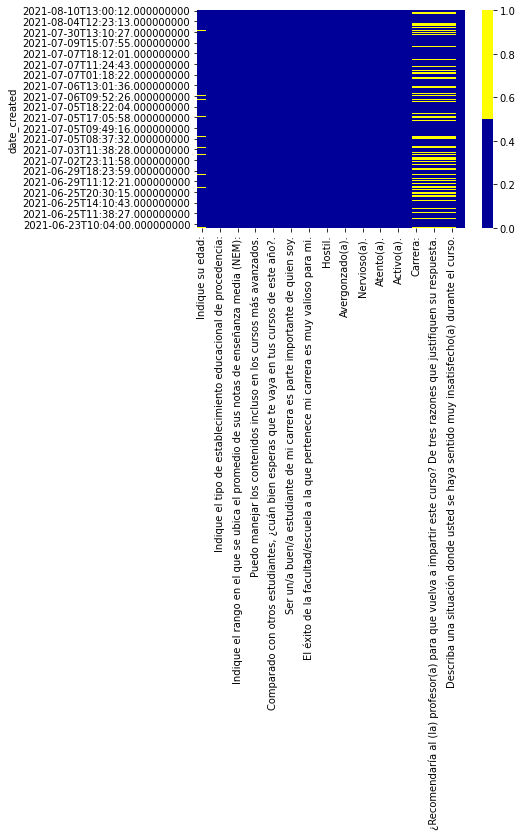

In [8]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## Conclusiones
* There is 340 data point with all answers
* Aproximately 20 persons didn´t answer or completed the poll
* Other missing points comes from open answer

    > Since there is evidence, the 20 empty rows are gonna be deleted

In [9]:
df_clean = df[df_missing['num_missing']!=6]
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace('.', '').str.replace(':', '')
df_clean.rename(columns=lambda x: x[:60], inplace=True)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 429 entries, 2021-08-10 13:00:12 to 2021-06-21 19:44:39
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   indique su edad                                               429 non-null    object 
 1   indique el género con el cual se identifica                   429 non-null    object 
 2   indique el tipo de establecimiento educacional de procedenci  429 non-null    object 
 3   indique el rango de su puntaje obtenido en la prueba de sele  429 non-null    object 
 4   indique el rango en el que se ubica el promedio de sus notas  429 non-null    object 
 5   puedo comprender en profundidad el contenido de los cursos d  429 non-null    float64
 6   puedo manejar los contenidos incluso en los cursos más avanz  429 non-null    float64
 7   puedo hacer un excelente trabajo r

C:\Users\giaan\AppData\Local\Temp/ipykernel_19288/2480658680.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace('.', '').str.replace(':', '')
c:\Users\giaan\Documents\Universidad\investigacion-docencia\env\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


* there are a lot of object type, this is gonna complicate the training, so it is important to cast to strings in the future

In [10]:
df_clean.head(10)

,indique su edad,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"comparado con otros estudiantes, ¿cuán bien esperas que te v","del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",...,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
date_created,,,,,,,,,,,,,,,,,,,,,
2021-08-10 13:00:12,24.0,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4.0,5.0,4.0,Mejor,5.0,...,4.0,4.0,4.0,5.0,5.0,4.0,1.0,2.0,5.0,Dentro de las más altas del curso.
2021-08-09 11:15:21,23.0,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3.0,3.0,3.0,Peor,3.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,En el promedio.
2021-08-06 08:19:44,25.0,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4.0,5.0,4.0,Mejor,5.0,...,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,5.0,En el promedio.
2021-08-05 18:37:16,23.0,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4.0,3.0,4.0,Peor,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,En el promedio.
2021-08-05 18:19:51,20.0,Femenino,Subvencionado,Entre 551 y 600,"Entre 6,0 y 6,4",5.0,4.0,5.0,Mejor,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2021-08-05 12:15:22,23.0,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,5 y 7,0",4.0,4.0,4.0,Mejor,5.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,Levemente sobre el promedio.
2021-08-05 02:04:07,24.0,Femenino,Municipal,Entre 601 y 650,"Entre 6,0 y 6,4",0.0,0.0,0.0,,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2021-08-05 01:01:09,24.0,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",2.0,3.0,3.0,Mejor,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2021-08-04 23:32:25,19.0,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4.0,4.0,4.0,Mejor,3.0,...,5.0,2.0,2.0,4.0,3.0,3.0,5.0,5.0,5.0,En el promedio.


## Analyzing zeros and empty values
* in this dataset, there are certain rows that are empty, it can be validated from the excel file

<AxesSubplot:>

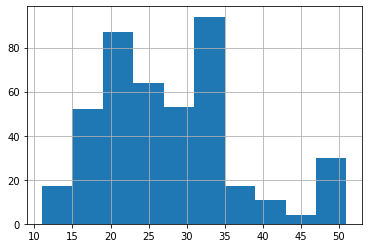

In [11]:
df_clean.apply( lambda s : s.value_counts().get(key=0,default=0), axis=1).hist()

There is mixed types of data structure in this column

In [12]:
df_final = df_clean.copy()
for i, val in enumerate(df_final[df_final.columns[0]]):
    if type(val) != float:
        print(val)

25 años
20 años
22 años 


In [13]:

for i, val in enumerate(df_final[df_final.columns[0]]):
    if type(val) != float:
        df_final = df_final.replace(to_replace = val,
                 value =float(val[:2]))

In [14]:
for i, val in enumerate(df_final[df_final.columns[0]]):
    if type(val) != float:
        print(val)

In [15]:
df_final.head()

,indique su edad,indique el género con el cual se identifica,indique el tipo de establecimiento educacional de procedenci,indique el rango de su puntaje obtenido en la prueba de sele,indique el rango en el que se ubica el promedio de sus notas,puedo comprender en profundidad el contenido de los cursos d,puedo manejar los contenidos incluso en los cursos más avanz,puedo hacer un excelente trabajo resolviendo problemas y en,"comparado con otros estudiantes, ¿cuán bien esperas que te v","del 1 al 5, en una escala de mal a mejor, ¿cómo crees que se",...,el (la) profesor(a) ofreció nuevas ideas y perspectivas acer,disfruté siendo un(a) estudiante de este curso,este curso cumplió mis expectativas,adquirí herramientas para el desarrollo de mis habilidades,estoy satisfecho(a) con la educación recibida en este curso,logré los resultados de aprendizaje del curso,la carga de este curso fue muy alta,este curso fue muy complejo,este es/fue un curso muy relevante para mi formación,"mi nota final del curso, ¿en qué cuartil se encontrará o se"
date_created,,,,,,,,,,,,,,,,,,,,,
2021-08-10 13:00:12,24.0,Masculino,Subvencionado,Entre 701 y 750,"Entre 6,5 y 7,0",4.0,5.0,4.0,Mejor,5.0,...,4.0,4.0,4.0,5.0,5.0,4.0,1.0,2.0,5.0,Dentro de las más altas del curso.
2021-08-09 11:15:21,23.0,Femenino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",3.0,3.0,3.0,Peor,3.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,En el promedio.
2021-08-06 08:19:44,25.0,Masculino,Subvencionado,Entre 651 y 700,"Entre 6,0 y 6,4",4.0,5.0,4.0,Mejor,5.0,...,5.0,5.0,4.0,5.0,5.0,5.0,2.0,2.0,5.0,En el promedio.
2021-08-05 18:37:16,23.0,Masculino,Subvencionado,Entre 601 y 650,"Entre 6,0 y 6,4",4.0,3.0,4.0,Peor,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,3.0,En el promedio.
2021-08-05 18:19:51,20.0,Femenino,Subvencionado,Entre 551 y 600,"Entre 6,0 y 6,4",5.0,4.0,5.0,Mejor,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


## Exportacion de la data

In [17]:
if not os.path.isfile(module_path + '/cleaned_student_data.xlsx'):
    df_final.to_excel(r'../cleaned_student_data.xlsx', index = False)